# **Import Data & Library**

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Akses folder berbagi
shared_folder_path = '/content/drive/MyDrive/FINDIT'

# Lihat file dalam folder
import os
print(os.listdir(shared_folder_path))

Mounted at /content/drive
['data-analytics-competition-find-it-2025.zip', 'randomforest.ipynb', '#3 catboost.ipynb', 'gradientboost.ipynb', 'gradientboost0.ipynb']


In [ ]:
import zipfile
archieve = zipfile.ZipFile('/content/drive/MyDrive/FINDIT/data-analytics-competition-find-it-2025.zip')
archieve.extractall()

In [ ]:
df_tr = pd.read_csv("/content/dataset/train.csv") # data train
df_tg = pd.read_csv("/content/dataset/target.csv") # data target
df_te = pd.read_csv("/content/dataset/test.csv") # data test

In [ ]:
# merge data
df = pd.merge(df_tr, df_tg, left_index=True, right_index=True)

In [ ]:
df_te = df_te.set_index('ID')

# **EDA (1)**

In [ ]:
display(df.head(), df_te.head())

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False


,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
ID,,,,,,,,,,,,,,,,
2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [ ]:
display(df.info(), df_te.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

None

None

In [ ]:
for column in df.select_dtypes(include='object').columns:
    print(f"Nilai unik untuk kolom data train'{column}': {df[column].unique()}")

Nilai unik untuk kolom data train'developerCountry': ['NORWAY' 'ADDRESS NOT LISTED IN PLAYSTORE' 'UNITED ARAB EMIRATES'
 'GERMANY' 'CANNOT IDENTIFY COUNTRY' 'FINLAND' 'SINGAPORE' 'UNITED STATES'
 'REPUBLIC OF KOREA' 'MONGOLIA' 'PAKISTAN' 'VIET NAM' 'OMAN' 'FRANCE'
 'INDIA' 'CHINA' 'NETHERLANDS' 'RUSSIAN FEDERATION' 'INDONESIA' 'ITALY'
 'UZBEKISTAN' 'UNITED KINGDOM' 'CANADA' 'NEW ZEALAND' 'SRI LANKA'
 'AUSTRALIA' "COTE D'IVOIRE" 'IRELAND' 'KAZAKHSTAN' 'HONG KONG' 'CHILE'
 'BAHRAIN' 'JAPAN' 'SWITZERLAND' 'ISRAEL' 'SPAIN' 'TURKEY' 'ESTONIA'
 'SWEDEN' 'DOMINICAN REPUBLIC' 'AUSTRIA' 'MALAYSIA' 'POLAND' 'CYPRUS'
 'UKRAINE' 'ISLE OF MAN' 'ARGENTINA' 'BANGLADESH' 'ICELAND' 'JORDAN'
 'MOROCCO' 'PERU' 'NIGER' 'BULGARIA' 'ROMANIA' 'SLOVENIA' 'SOUTH AFRICA'
 'KENYA' 'NIGERIA' 'ALBANIA' 'CZECH REPUBLIC' 'SAUDI ARABIA' 'PANAMA'
 'ANDORRA' 'THAILAND' 'MALTA' 'VENEZUELA' 'GREECE' 'YEMEN' 'EGYPT'
 'PHILIPPINES' 'MEXICO' 'BRUNEI DARUSSALAM' 'PORTUGAL'
 'TAIWAN, PROVINCE OF CHINA' 'GEORGIA' 'CAYMAN ISLAN

In [ ]:
for column in df_te.select_dtypes(include='object').columns:
    print(f"Nilai unik untuk kolom data test'{column}': {df_te[column].unique()}")

Nilai unik untuk kolom data test'developerCountry': ['ADDRESS NOT LISTED IN PLAYSTORE' 'ICELAND' 'UNITED STATES' 'ISRAEL'
 'JAPAN' 'INDIA' 'PAKISTAN' 'CANNOT IDENTIFY COUNTRY' 'HONG KONG'
 'REPUBLIC OF KOREA' 'ITALY' 'POLAND' 'VIET NAM' 'CHINA' 'FINLAND'
 'RUSSIAN FEDERATION' 'AUSTRIA' 'CANADA' 'FRANCE' 'UNITED ARAB EMIRATES'
 'GERMANY' 'SINGAPORE' 'UNITED KINGDOM' 'CYPRUS' 'MOROCCO' 'UKRAINE'
 'AUSTRALIA' 'EGYPT' 'NETHERLANDS' 'DENMARK' 'COLOMBIA' 'CZECH REPUBLIC'
 'THAILAND' 'BOSNIA AND HERZEGOVINA' 'CAMEROON' 'SWEDEN' 'DOMINICA'
 'INDONESIA' 'PARAGUAY' 'SRI LANKA' 'ESTONIA' 'PHILIPPINES' 'SOUTH AFRICA'
 'NEPAL' 'SAUDI ARABIA' 'ARGENTINA' 'TURKEY' 'SPAIN' 'SWITZERLAND'
 'IRELAND' 'LUXEMBOURG' 'KAZAKHSTAN' 'JORDAN' 'MEXICO' 'ECUADOR'
 'BULGARIA' 'MAURITIUS' 'SERBIA' 'BRAZIL' 'BELARUS' 'MALI' 'KENYA'
 'VENEZUELA (BOLIVARIAN REPUBLIC OF)' 'BANGLADESH' 'CHILE' 'MALTA'
 'ROMANIA' 'GEORGIA' 'TOGO' 'MALAYSIA' 'HUNGARY' 'TUNISIA' 'COSTA RICA'
 'RWANDA' 'PALESTINE, STATE OF' 'NEW ZEALAND' 'UG

In [ ]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Statistik Deskriptif dari '{column}':\n{df[column].describe()}\n")

Statistik Deskriptif dari 'userRatingCount':
count    7.000000e+03
mean     3.256274e+04
std      5.501431e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      8.800000e+01
max      3.854334e+07
Name: userRatingCount, dtype: float64

Statistik Deskriptif dari 'isCorporateEmailScore':
count    5872.000000
mean       45.740293
std        49.361215
min         0.000000
25%         0.000000
50%         0.000000
75%        99.000000
max        99.000000
Name: isCorporateEmailScore, dtype: float64

Statistik Deskriptif dari 'adSpent':
count    1.321000e+03
mean     3.977563e+03
std      9.219919e+04
min      7.038525e-03
25%      1.086920e+00
50%      7.945580e+00
75%      4.908375e+01
max      3.143906e+06
Name: adSpent, dtype: float64

Statistik Deskriptif dari 'appAge':
count    6950.000000
mean       57.093060
std        37.169895
min         0.533333
25%        27.533333
50%        52.866667
75%        80.000000
max       196.466667
Name: appAge, dtype: float64

In [ ]:
for column in df_te.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Statistik Deskriptif dari '{column}':\n{df_te[column].describe()}\n")

Statistik Deskriptif dari 'userRatingCount':
count    3.000000e+03
mean     3.576905e+04
std      4.455556e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      8.250000e+01
max      1.319941e+07
Name: userRatingCount, dtype: float64

Statistik Deskriptif dari 'isCorporateEmailScore':
count    2560.000000
mean       46.444922
std        49.415285
min         0.000000
25%         0.000000
50%         0.000000
75%        99.000000
max        99.000000
Name: isCorporateEmailScore, dtype: float64

Statistik Deskriptif dari 'adSpent':
count      574.000000
mean       286.612276
std       1890.997697
min          0.007450
25%          1.121507
50%          7.186537
75%         44.878463
max      37542.779693
Name: adSpent, dtype: float64

Statistik Deskriptif dari 'appAge':
count    2983.000000
mean       56.044396
std        36.417410
min        -1.200000
25%        26.933333
50%        51.933333
75%        77.750000
max       194.466667
Name: appAge, dtype: float64

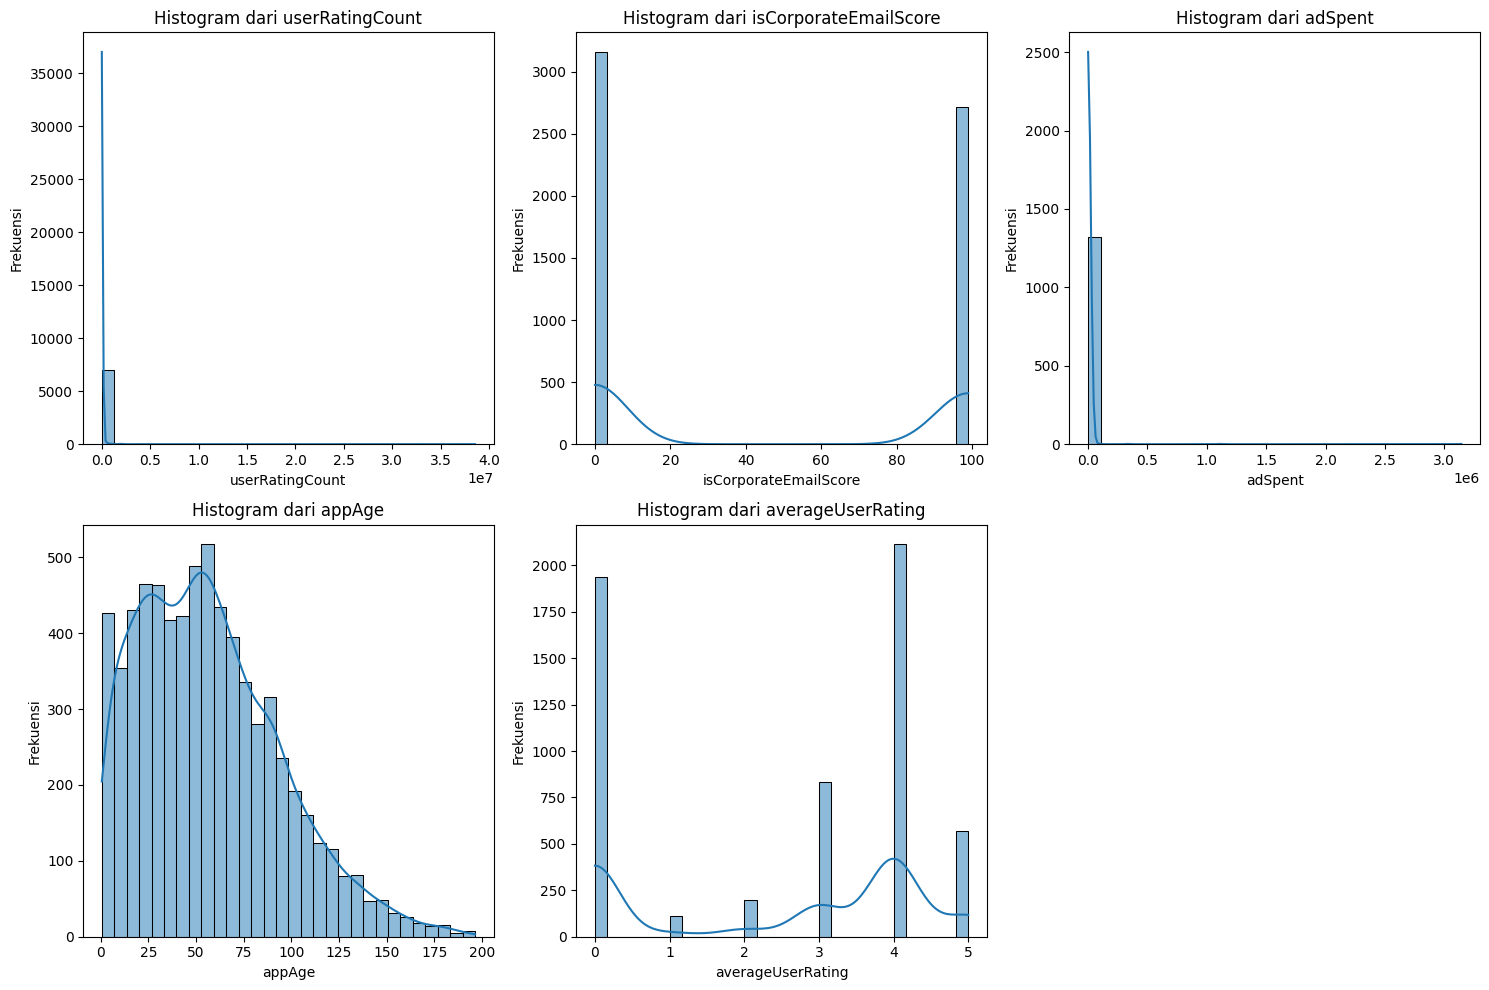

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ambil kolom numerik
cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(cols)

# Setup subplot: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # agar bisa diakses sebagai 1D array

for i, col in enumerate(cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Sembunyikan subplot kosong jika jumlah kolom < total slot subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


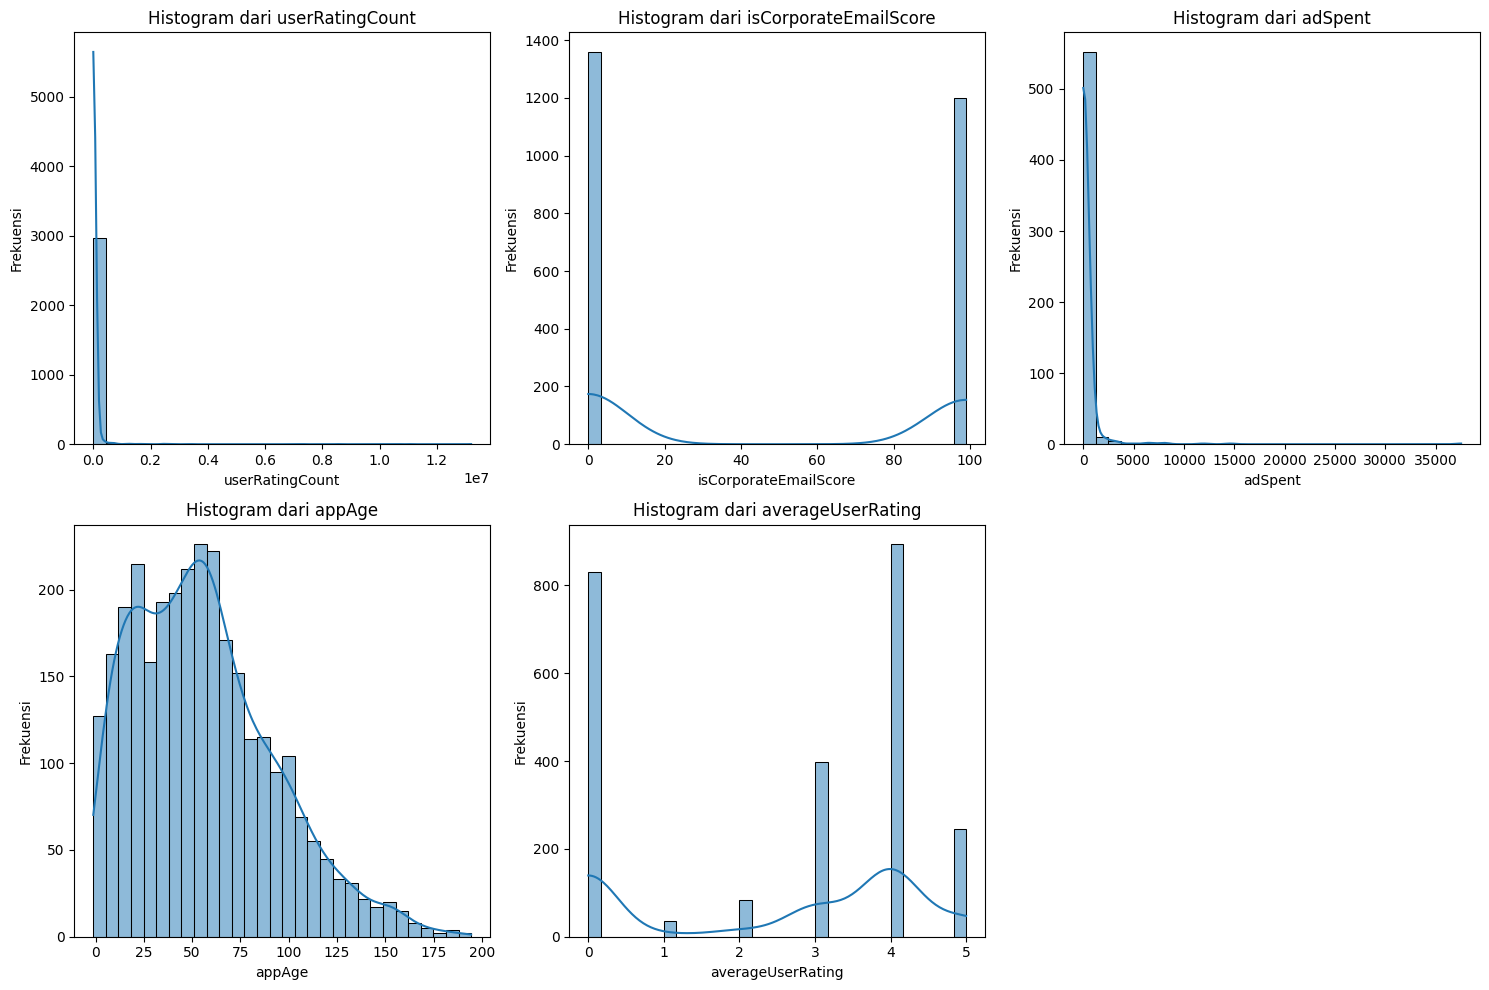

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ambil kolom numerik
cols = df_te.select_dtypes(include=['int64', 'float64']).columns
n = len(cols)

# Setup subplot: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # agar bisa diakses sebagai 1D array

for i, col in enumerate(cols):
    sns.histplot(df_te[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Sembunyikan subplot kosong jika jumlah kolom < total slot subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df['hasTermsOfServiceLink'].value_counts(normalize=True) * 100


,proportion
hasTermsOfServiceLink,
False,60.211416
True,39.788584


In [ ]:
df['hasTermsOfServiceLinkRating'].value_counts(normalize=True) * 100


,proportion
hasTermsOfServiceLinkRating,
high,60.211416
low,39.788584


In [ ]:
df_te['hasTermsOfServiceLink'].value_counts(normalize=True) * 100


,proportion
hasTermsOfServiceLink,
False,61.886429
True,38.113571


In [ ]:
df_te['hasTermsOfServiceLinkRating'].value_counts(normalize=True) * 100


,proportion
hasTermsOfServiceLinkRating,
high,61.886429
low,38.113571


In [ ]:
df['coppaRisk'].value_counts(normalize=True) * 100


,proportion
coppaRisk,
False,90.057143
True,9.942857


In [ ]:
df.isna().mean()*100

,0
developerCountry,0.000000
countryCode,0.914286
userRatingCount,0.000000
primaryGenreName,0.000000
downloads,30.700000
deviceType,0.000000
hasPrivacyLink,10.714286
hasTermsOfServiceLink,66.214286
hasTermsOfServiceLinkRating,66.214286
isCorporateEmailScore,16.114286


# **Preprocessing**

## Inkonsistensi Data
Penulisan nama negara pada data train dan test terdapat perbedaan, seperti "VIETNAM" dan "VIET NAM", 'VENEZUELA (BOLIVARIAN REPUBLIC OF)' dan 'Venezuela, Bolivarian Republic of'.

Selain itu, data seperti "ADDRESS NOT LISTED IN PLAYSTORE" dan "CANNOT IDENTIFY COUNTRY" menunjukkan data yang missing atau unretrievable information.

In [ ]:
mapp = {
    'VIETNAM': 'VIET NAM',
    'VENEZUELA (BOLIVARIAN REPUBLIC OF)':'VENEZUELA',
    'ADDRESS NOT LISTED IN PLAYSTORE': 'Unretrievable Information',
    'CANNOT IDENTIFY COUNTRY': 'Unretrievable Information',
    'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.': 'Unretrievable Information',
    'STATUTORY MASKING ENABLED': 'Unretrievable Information'
}

df['developerCountry'] = df['developerCountry'].replace(mapp)
df_te['developerCountry'] = df_te['developerCountry'].replace(mapp)

In [ ]:
display(sorted(df['developerCountry'].unique()), sorted(df_te['developerCountry'].unique()))

['ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'BAHRAIN',
 'BANGLADESH',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BRAZIL',
 'BRITISH VIRGIN ISLANDS',
 'BRUNEI DARUSSALAM',
 'BULGARIA',
 'BURUNDI',
 'CANADA',
 'CAYMAN ISLANDS',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COSTA RICA',
 "COTE D'IVOIRE",
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GIBRALTAR',
 'GREECE',
 'GREENLAND',
 'GUATEMALA',
 'HONDURAS',
 'HONG KONG',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 'INDONESIA',
 'IRAQ',
 'IRELAND',
 'ISLE OF MAN',
 'ISRAEL',
 'ITALY',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KENYA',
 'KUWAIT',
 'KYRGYZSTAN',
 'LEBANON',
 'LITHUANIA',
 'LUXEMBOURG',
 'MALAYSIA',
 'MALDIVES',
 'MALI',
 'MALTA',
 'MEXICO',
 'MONGOLIA',
 'MOROCCO',
 'NEPAL',
 'NETHERLANDS',
 'NEW ZEALAND',
 'NICARAGUA',
 'NIGER',
 'NIGERIA',
 'NORWAY',
 'OMAN',
 'PAKISTAN',
 'PALESTINE

['ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'BANGLADESH',
 'BELARUS',
 'BOSNIA AND HERZEGOVINA',
 'BRAZIL',
 'BULGARIA',
 'CAMEROON',
 'CANADA',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COSTA RICA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DOMINICA',
 'ECUADOR',
 'EGYPT',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'HONG KONG',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 'INDONESIA',
 'IRELAND',
 'ISRAEL',
 'ITALY',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KENYA',
 'KUWAIT',
 'LUXEMBOURG',
 'MALAYSIA',
 'MALI',
 'MALTA',
 'MAURITIUS',
 'MEXICO',
 'MONTENEGRO',
 'MOROCCO',
 'NEPAL',
 'NETHERLANDS',
 'NEW ZEALAND',
 'NIGER',
 'NORWAY',
 'PAKISTAN',
 'PALESTINE, STATE OF',
 'PARAGUAY',
 'PHILIPPINES',
 'POLAND',
 'REPUBLIC OF KOREA',
 'ROMANIA',
 'RUSSIAN FEDERATION',
 'RWANDA',
 'SAINT VINCENT AND THE GRENADINES',
 'SAUDI ARABIA',
 'SERBIA',
 'SINGAPORE',
 'SLOVAKIA',
 'SLOVENIA',
 'SOUTH AFRICA',
 'SPAIN',
 'SRI LANKA',
 'SWEDEN',
 'SWITZERLAND',
 'THAILAND',
 'TOG

primaryGenreName yang sebenarnya mirip atau masih dalam satu kategori tapi tercatat sebagai kategori/nama yang berbeda, contoh:

- Books: Book
- Newspapers: News
- Photography: Photo
- Social Networking: Social

In [ ]:
mapping = {
    r'(?i)newspapers': 'News',
    r'(?i)books': 'Book',
    r'(?i)photography': 'Photo',
    r'(?i)social networking': 'Social'
}

for pattern, replacement in mapping.items():
    df['primaryGenreName'] = df['primaryGenreName'].str.replace(pattern, replacement, regex=True)
    df_te['primaryGenreName'] = df_te['primaryGenreName'].str.replace(pattern, replacement, regex=True)

In [ ]:
display(sorted(df['primaryGenreName'].unique()), sorted(df_te['primaryGenreName'].unique()))

['Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Book',
 'Book & Reference',
 'Business',
 'Comics',
 'Communication',
 'Dating',
 'Developer Tools',
 'Education',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Games',
 'Graphics & Design',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Magazines & News',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'Navigation',
 'News',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photo',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Shopping',
 'Social',
 'Sports',
 'Stickers',
 'Tools',
 'Travel',
 'Travel & Local',
 'Utilities',
 'Video Players & Editors',
 'Weather']

['Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Book',
 'Book & Reference',
 'Business',
 'Comics',
 'Communication',
 'Dating',
 'Developer Tools',
 'Education',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Games',
 'Graphics & Design',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'Navigation',
 'News',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photo',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Shopping',
 'Social',
 'Sports',
 'Stickers',
 'Tools',
 'Travel',
 'Travel & Local',
 'Utilities',
 'Video Players & Editors',
 'Weather']

data downloads ada yang tidak sesuai format minimal-maksimal

In [ ]:
def check_invalid_downloads(values):
    invalids = []
    for val in values:
        if pd.isna(val): continue
        try:
            low, high = val.split(' - ')
            if int(low) > int(high):
                invalids.append(val)
        except:
            invalids.append(val)
    return invalids

invalid_train = check_invalid_downloads(df['downloads'].unique())
invalid_test = check_invalid_downloads(df_te['downloads'].unique())

print("Train:", invalid_train)
print("Test:", invalid_test)


Train: ['10 - 1', '5 - 1', '500 - 1', '50 - 1']
Test: ['10 - 1']


In [ ]:
# mengganti data downloads yang tidak sesuai format
mapp = {
    '10 - 1':'1 - 10',
    '5 - 1': '1 - 5',
    '500 - 1': '1 - 500',
    '50 - 1': '1 - 50'
}

df['downloads'] = df['downloads'].replace(mapp)
df_te['downloads'] = df_te['downloads'].replace(mapp)

In [ ]:
display(df['downloads'].unique(), df_te['downloads'].unique())

array([nan, '50 - 100', '50000000 - 100000000', '1000 - 5000', '1 - 5',
       '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '1 - 1', '5000000 - 10000000', '1 - 10',
       '100000000 - 500000000', '10000000000 - 15000000000', '1 - 500',
       '500000000 - 1000000000', '1000000000 - 5000000000', '1 - 50'],
      dtype=object)

array([nan, '5000 - 10000', '10000 - 50000', '1000000 - 5000000',
       '100000 - 500000', '500000 - 1000000', '50 - 100', '100 - 500',
       '10 - 50', '1000 - 5000', '50000 - 100000', '1 - 5',
       '5000000 - 10000000', '10000000 - 50000000', '500 - 1000', '0 - 1',
       '5 - 10', '50000000 - 100000000', '1 - 1',
       '500000000 - 1000000000', '100000000 - 500000000', '1 - 10'],
      dtype=object)

pada data test variabel appAge ada yang bernilai negatif.

In [ ]:
df_te['appAge'].describe()

,appAge
count,2983.000000
mean,56.044396
std,36.417410
min,-1.200000
25%,26.933333
50%,51.933333
75%,77.750000
max,194.466667


In [ ]:
df_te['appAge'] = df_te['appAge'].mask(df_te['appAge'] < 0)

In [ ]:
df_te['appAge'].describe()

,appAge
count,2982.000000
mean,56.063593
std,36.408419
min,0.633333
25%,26.941667
50%,51.950000
75%,77.758333
max,194.466667


## Duplikasi Data

In [ ]:
df.duplicated().any()

np.True_

In [ ]:
df[df.duplicated(keep=False)]

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
169,Unretrievable Information,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,8.866667,0.0,NaN,high,low,False
1389,Unretrievable Information,GLOBAL,0,Shopping,10 - 50,GLOBAL,True,NaN,NaN,99.0,NaN,63.166667,NaN,NaN,low,low,False
1963,Unretrievable Information,GLOBAL,0,Book & Reference,1 - 5,GLOBAL,True,NaN,NaN,0.0,NaN,12.866667,NaN,NaN,low,low,False
2151,Unretrievable Information,GLOBAL,0,Book & Reference,1 - 5,GLOBAL,True,NaN,NaN,0.0,NaN,12.866667,NaN,NaN,low,low,False
2405,Unretrievable Information,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,8.866667,0.0,NaN,high,low,False
3565,Unretrievable Information,GLOBAL,0,Education,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,98.400000,0.0,NaN,low,low,False
4735,Unretrievable Information,GLOBAL,0,Education,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,98.400000,0.0,NaN,low,low,False
6746,Unretrievable Information,GLOBAL,0,Shopping,10 - 50,GLOBAL,True,NaN,NaN,99.0,NaN,63.166667,NaN,NaN,low,low,False


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.duplicated().any()

np.False_

## Feature Engineering

### downloads

In [ ]:
# Re-kategorisasi downloads, jika ratusan = 'low', jika ribuan = 'medium', jika jutaan = 'high'
def categorize_downloads(downloads):
    if pd.isna(downloads):
        return np.nan

    low, high = downloads.split(' - ')
    low, high = int(low), int(high)

    # Kategorisasi berdasarkan rentang angka
    if high < 1000:
        return 'low'  # Ratusan
    elif high < 1000000:
        return 'medium'  # Ribuan
    else:
        return 'high'  # Jutaan

# Terapkan fungsi untuk mengategorikan setiap nilai dalam kolom 'downloads'
df['downloads'] = df['downloads'].apply(categorize_downloads)
df_te['downloads'] = df_te['downloads'].apply(categorize_downloads)

### primaryGenreName

In [ ]:
# Step 1: Pecah isi kolom 'primaryGenreName' berdasarkan '&' atau separator lain
df['genre_split'] = df['primaryGenreName'].str.split(' & |, | &|& ', expand=False)

# Step 2: Explode untuk membuat setiap genre jadi baris sendiri
df_exploded = df.explode('genre_split')

# Step 3: One Hot Encoding dari genre_split
one_hot = pd.get_dummies(df_exploded['genre_split'])

# Step 4: Gabung kembali berdasarkan index aslinya
one_hot_grouped = one_hot.groupby(df_exploded.index).max()

# Step 5 (opsional): Gabungkan hasil one-hot kembali ke df utama
df = df.drop(columns='genre_split')  # hapus kolom list kalau tidak perlu
df = pd.concat([df, one_hot_grouped], axis=1)

In [ ]:
# Step 1: Pecah isi kolom 'primaryGenreName' berdasarkan '&' atau separator lain
df_te['genre_split'] = df_te['primaryGenreName'].str.split(' & |, | &|& ', expand=False)

# Step 2: Explode untuk membuat setiap genre jadi baris sendiri
df_te_exploded = df_te.explode('genre_split')

# Step 3: One Hot Encoding dari genre_split
one_hot = pd.get_dummies(df_te_exploded['genre_split'])

# Step 4: Gabung kembali berdasarkan index aslinya
one_hot_grouped = one_hot.groupby(df_te_exploded.index).max()

# Step 5 (opsional): Gabungkan hasil one-hot kembali ke df utama
df_te = df_te.drop(columns='genre_split')  # hapus kolom list kalau tidak perlu
df_te = pd.concat([df_te, one_hot_grouped], axis=1)

In [ ]:
df.drop(columns=['primaryGenreName'], inplace=True)
df_te.drop(columns=['primaryGenreName'], inplace=True)

In [ ]:
# Convert boolean columns to strings before fitting OneHotEncoder
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

for col in df_te.columns:
    if df_te[col].dtype == 'bool':
        df_te[col] = df_te[col].astype(int)

In [ ]:
df.columns

Index(['developerCountry', 'countryCode', 'userRatingCount', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'isCorporateEmailScore', 'adSpent',
       'appAge', 'averageUserRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'coppaRisk', 'Art',
       'Audio', 'Auto', 'Beauty', 'Book', 'Business', 'Comics',
       'Communication', 'Dating', 'Demo', 'Design', 'Developer Tools', 'Drink',
       'Editors', 'Education', 'Entertainment', 'Events', 'Finance', 'Fitness',
       'Food', 'Games', 'Graphics', 'Health', 'Home', 'House', 'Libraries',
       'Lifestyle', 'Local', 'Magazines', 'Maps', 'Medical', 'Music',
       'Navigation', 'News', 'Parenting', 'Personalization', 'Photo',
       'Productivity', 'Reference', 'Shopping', 'Social', 'Sports', 'Stickers',
       'Tools', 'Travel', 'Utilities', 'Vehicles', 'Video', 'Video Players',
       'Weather'],
      dtype='object')

In [ ]:
df_te.columns

Index(['developerCountry', 'countryCode', 'userRatingCount', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'isCorporateEmailScore', 'adSpent',
       'appAge', 'averageUserRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'Art', 'Audio', 'Auto',
       'Beauty', 'Book', 'Business', 'Comics', 'Communication', 'Dating',
       'Demo', 'Design', 'Developer Tools', 'Drink', 'Editors', 'Education',
       'Entertainment', 'Events', 'Finance', 'Fitness', 'Food', 'Games',
       'Graphics', 'Health', 'Home', 'House', 'Libraries', 'Lifestyle',
       'Local', 'Magazines', 'Maps', 'Medical', 'Music', 'Navigation', 'News',
       'Parenting', 'Personalization', 'Photo', 'Productivity', 'Reference',
       'Shopping', 'Social', 'Sports', 'Stickers', 'Tools', 'Travel',
       'Utilities', 'Vehicles', 'Video', 'Video Players', 'Weather'],
      dtype='object')

## Missing Value

In [ ]:
pip install missingno

<Axes: >

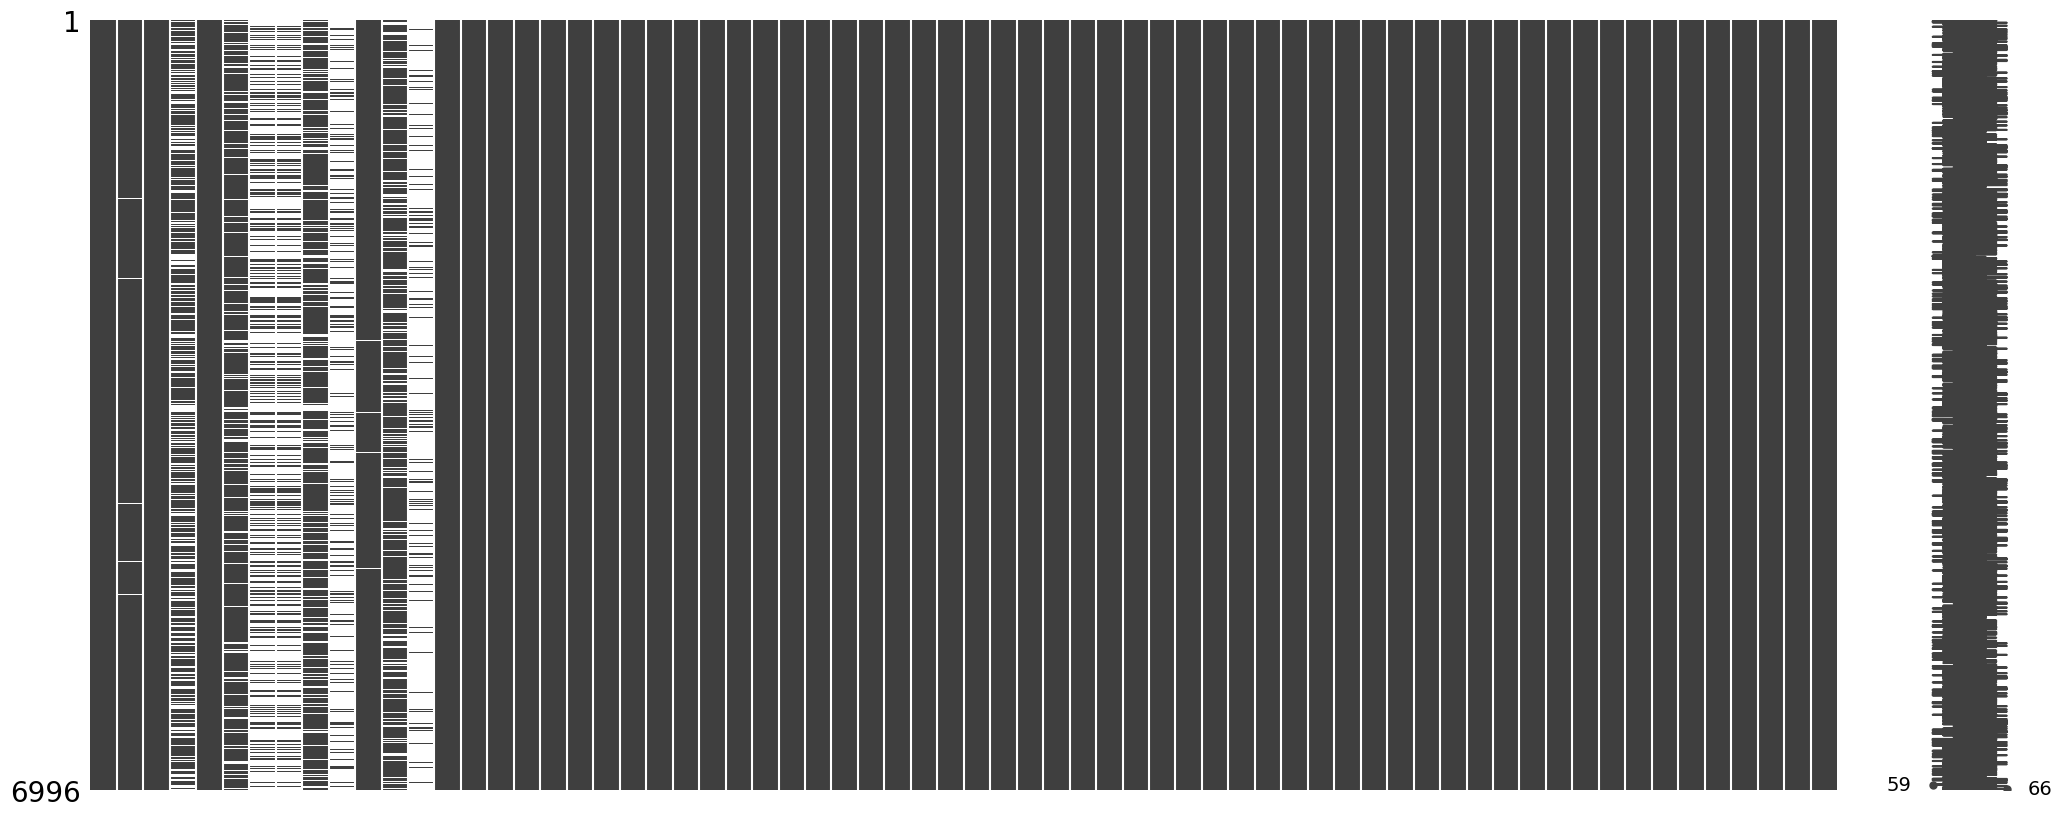

In [ ]:
import missingno as msno
# Visualize missing values
msno.matrix(df)

In [ ]:
display(df.isna().mean()*100, df_te.isna().mean()*100)

,0
developerCountry,0.000000
countryCode,0.914808
userRatingCount,0.000000
downloads,30.688965
deviceType,0.000000
...,...
Utilities,0.000000
Vehicles,0.000000
Video,0.000000
Video Players,0.000000


,0
developerCountry,0.000000
countryCode,0.966667
userRatingCount,0.000000
downloads,29.366667
deviceType,0.000000
...,...
Utilities,0.000000
Vehicles,0.000000
Video,0.000000
Video Players,0.000000


### adSpent

In [ ]:
df['adSpent'].fillna(0, inplace=True)
df_te['adSpent'].fillna(0, inplace=True)

<ipython-input-33-c3104bf9f49b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adSpent'].fillna(0, inplace=True)
<ipython-input-33-c3104bf9f49b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [ ]:
display(df.isna().mean()*100, df_te.isna().mean()*100)

,0
developerCountry,0.000000
countryCode,0.914808
userRatingCount,0.000000
downloads,30.688965
deviceType,0.000000
...,...
Utilities,0.000000
Vehicles,0.000000
Video,0.000000
Video Players,0.000000


,0
developerCountry,0.000000
countryCode,0.966667
userRatingCount,0.000000
downloads,29.366667
deviceType,0.000000
...,...
Utilities,0.000000
Vehicles,0.000000
Video,0.000000
Video Players,0.000000


In [ ]:
# Cek duplikasi lagi
df.duplicated().any()

np.True_

In [ ]:
df[df.duplicated(keep=False)]

,developerCountry,countryCode,userRatingCount,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,...,Social,Sports,Stickers,Tools,Travel,Utilities,Vehicles,Video,Video Players,Weather
1587,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1763,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1993,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2420,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2656,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3094,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3153,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3213,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3423,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3660,Unretrievable Information,GLOBAL,0,low,GLOBAL,True,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

## Encoding

In [ ]:
df.select_dtypes(include='object').columns

Index(['developerCountry', 'countryCode', 'downloads', 'deviceType',
       'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')

In [ ]:
cat_cols = ['developerCountry', 'countryCode', 'downloads', 'deviceType',
       'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform sekaligus banyak kolom
encoded_array = onehot_encoder.fit_transform(df[cat_cols])

# Ambil nama kolom baru hasil OHE
encoded_cols = onehot_encoder.get_feature_names_out(cat_cols)

# Ubah jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Gabungkan dengan kolom non-kategorikal
df = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform sekaligus banyak kolom
encoded_array = onehot_encoder.fit_transform(df_te[cat_cols])

# Ambil nama kolom baru hasil OHE
encoded_cols = onehot_encoder.get_feature_names_out(cat_cols)

# Ubah jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_te.index)

# Gabungkan dengan kolom non-kategorikal
df_te = pd.concat([df_te.drop(columns=cat_cols), encoded_df], axis=1)


In [ ]:
#Ganti nama kolom nan
df.rename(columns={
    'hasTermsOfServiceLink_nan': 'hasTermsOfServiceLink_Missing',
    'hasTermsOfServiceLinkRating_nan': 'hasTermsOfServiceLinkRating_Missing',
    'appContentBrandSafetyRating_nan': 'appContentBrandSafetyRating_Missing'
    }, inplace=True)

df_te.rename(columns={
    'hasTermsOfServiceLink_nan': 'hasTermsOfServiceLink_Missing',
    'hasTermsOfServiceLinkRating_nan': 'hasTermsOfServiceLinkRating_Missing',
    'appContentBrandSafetyRating_nan': 'appContentBrandSafetyRating_Missing'
    }, inplace=True)


In [ ]:
list1 = sorted(df.columns)
list2 = sorted(df_te.columns)

set1 = set(list1)
set2 = set(list2)

only_in_list1 = sorted(set1 - set2)
only_in_list2 = sorted(set2 - set1)
common_columns = sorted(set1 & set2)

print("Kolom hanya di list 1:")
print(only_in_list1)

print("\nKolom hanya di list 2:")
print(only_in_list2)

print("\nKolom yang sama di kedua list:")
print(common_columns)


Kolom hanya di list 1:
['coppaRisk', 'countryCode_AF', 'countryCode_AT', 'countryCode_BG', 'countryCode_BH', 'countryCode_BJ', 'countryCode_CD', 'countryCode_CM', 'countryCode_CY', 'countryCode_DJ', 'countryCode_DK', 'countryCode_EE', 'countryCode_GE', 'countryCode_GR', 'countryCode_GU', 'countryCode_GY', 'countryCode_HN', 'countryCode_HR', 'countryCode_IR', 'countryCode_JM', 'countryCode_JO', 'countryCode_LK', 'countryCode_MK', 'countryCode_MM', 'countryCode_MN', 'countryCode_NI', 'countryCode_NZ', 'countryCode_PA', 'countryCode_PR', 'countryCode_PY', 'countryCode_RE', 'countryCode_SD', 'countryCode_SK', 'countryCode_SN', 'countryCode_SX', 'countryCode_UY', 'developerCountry_ALBANIA', 'developerCountry_ALGERIA', 'developerCountry_ANDORRA', 'developerCountry_ANGOLA', 'developerCountry_BAHRAIN', 'developerCountry_BELGIUM', 'developerCountry_BELIZE', 'developerCountry_BRITISH VIRGIN ISLANDS', 'developerCountry_BRUNEI DARUSSALAM', 'developerCountry_BURUNDI', 'developerCountry_CAYMAN ISLAN

In [ ]:
# Buat kolom pada data train yg hanya ada di data test
for col in only_in_list2:
    if col not in df.columns:
        df[col] = 0

for col in only_in_list1:
    if col != 'coppaRisk' and col not in df_te.columns:
        df_te[col] = 0

In [ ]:
# Cek ulang apakah kolom sudah sama
list1 = sorted(df.columns)
list2 = sorted(df_te.columns)

set1 = set(list1)
set2 = set(list2)

only_in_list1 = sorted(set1 - set2)
only_in_list2 = sorted(set2 - set1)
common_columns = sorted(set1 & set2)

print("Kolom hanya di list 1:")
print(only_in_list1)

print("\nKolom hanya di list 2:")
print(only_in_list2)

print("\nKolom yang sama di kedua list:")
print(common_columns)


Kolom hanya di list 1:
['coppaRisk']

Kolom hanya di list 2:
[]

Kolom yang sama di kedua list:
['Art', 'Audio', 'Auto', 'Beauty', 'Book', 'Business', 'Comics', 'Communication', 'Dating', 'Demo', 'Design', 'Developer Tools', 'Drink', 'Editors', 'Education', 'Entertainment', 'Events', 'Finance', 'Fitness', 'Food', 'Games', 'Graphics', 'Health', 'Home', 'House', 'Libraries', 'Lifestyle', 'Local', 'Magazines', 'Maps', 'Medical', 'Music', 'Navigation', 'News', 'Parenting', 'Personalization', 'Photo', 'Productivity', 'Reference', 'Shopping', 'Social', 'Sports', 'Stickers', 'Tools', 'Travel', 'Utilities', 'Vehicles', 'Video', 'Video Players', 'Weather', 'adSpent', 'appAge', 'appContentBrandSafetyRating_Missing', 'appContentBrandSafetyRating_high', 'appContentBrandSafetyRating_low', 'appContentBrandSafetyRating_medium', 'appDescriptionBrandSafetyRating_high', 'appDescriptionBrandSafetyRating_low', 'appDescriptionBrandSafetyRating_medium', 'averageUserRating', 'countryCode_AE', 'countryCode_AF

In [ ]:
# Daftar kolom asli yang di-OHE
original_cols = ['countryCode', 'downloads', 'hasPrivacyLink']

for base_col in original_cols:
    # Cari semua kolom hasil OHE yang berisi nama kolom asli (kecuali penanda *_nan)
    ohe_cols = [col for col in df.columns if base_col in col and col != f'{base_col}_nan']

    for dataset in [df, df_te]:
        if f'{base_col}_nan' in dataset.columns:
            # Cari baris yang sebelumnya NaN sebelum OHE
            nan_rows = dataset[f'{base_col}_nan'] == 1

            # Set nilai menjadi np.nan di kolom hasil OHE terkait
            dataset.loc[nan_rows, ohe_cols] = np.nan

            # Hapus kolom penanda nan
            dataset.drop(columns=f'{base_col}_nan', inplace=True)


In [ ]:
display(df.head(), df_te.head())

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,coppaRisk,Art,Audio,Auto,Beauty,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
0,127731,99.0,14.017220,160.400000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,99.0,0.000000,17.500000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51143,0.0,31.883163,30.766667,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1074,99.0,0.000000,71.533333,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,99.0,0.000000,52.400000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,Art,Audio,Auto,Beauty,Book,...,developerCountry_NIGERIA,developerCountry_OMAN,developerCountry_PANAMA,developerCountry_PERU,developerCountry_PORTUGAL,developerCountry_QATAR,developerCountry_SENEGAL,"developerCountry_TAIWAN, PROVINCE OF CHINA",developerCountry_UZBEKISTAN,developerCountry_ZIMBABWE
ID,,,,,,,,,,,,,,,,,,,,,
2807,2,NaN,0.000000,81.600000,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1742,0,0.0,0.027742,24.700000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,13059,99.0,9.249056,40.300000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2635,0,NaN,0.000000,39.233333,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9047,0,NaN,0.000000,65.533333,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['coppaRisk'])
y = df['coppaRisk']
X_test = df_te[X.columns]

In [ ]:
display(X.head(), X_test.head())

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,Art,Audio,Auto,Beauty,Book,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
0,127731,99.0,14.017220,160.400000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,99.0,0.000000,17.500000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51143,0.0,31.883163,30.766667,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1074,99.0,0.000000,71.533333,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,99.0,0.000000,52.400000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,Art,Audio,Auto,Beauty,Book,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
ID,,,,,,,,,,,,,,,,,,,,,
2807,2,NaN,0.000000,81.600000,5.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0,0.0,0.027742,24.700000,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,13059,99.0,9.249056,40.300000,4.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2635,0,NaN,0.000000,39.233333,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,0,NaN,0.000000,65.533333,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.isna().mean()*100

,0
userRatingCount,0.000000
isCorporateEmailScore,14.666667
adSpent,0.000000
appAge,0.600000
averageUserRating,17.133333
...,...
developerCountry_SAINT VINCENT AND THE GRENADINES,0.000000
developerCountry_SLOVAKIA,0.000000
developerCountry_TOGO,0.000000
developerCountry_TUNISIA,0.000000


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop=True, inplace = True)

# Pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class RandomSampleImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, random_state=None):
        self.columns = columns
        self.random_state = random_state
        self.prob_distributions = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            value_counts = X[col].value_counts(normalize=True, dropna=True)
            self.prob_distributions[col] = value_counts
        return self

    def transform(self, X):
        X = X.copy()
        rng = np.random.default_rng(self.random_state)
        for col in self.columns:
            mask = X[col].isnull()
            probs = self.prob_distributions[col]
            sampled_values = rng.choice(probs.index, size=mask.sum(), p=probs.values)
            X.loc[mask, col] = sampled_values
        return X

    # Add get_feature_names_out method
    def get_feature_names_out(self, input_features=None):
        """Return the feature names."""
        return self.columns # or input_features if you want to pass through names

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

appAge_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median'))
])

num_cols = ['isCorporateEmailScore', 'averageUserRating']
num_pipeline = Pipeline([
    ('random_imputer', RandomSampleImputer(columns=num_cols, random_state=42)),
])

kat = df.filter(like='countryCode', axis=1).columns.tolist() + \
      df.filter(like='downloads', axis=1).columns.tolist() + \
      df.filter(like='hasPrivacyLink', axis=1).columns.tolist()
cat_pipeline = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=5))
])


In [ ]:
# Preprocessing untuk semua kolom termasuk yang belum disebut
preprocessor = ColumnTransformer([
    ("appAge", appAge_pipeline, ['appAge']),
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, kat)
], remainder='passthrough')  # Kolom lainnya tetap diproses setelah imputasi


In [ ]:
# Pipeline akhir dengan SMOTE (hanya digunakan untuk training)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
balanced_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42))
])


In [ ]:
preprocessor_scaler = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
])

In [ ]:
preprocessor_scaler.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('appAge',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['appAge']),
                                                 ('num',
                                                  Pipeline(steps=[('random_imputer',
                                                                   RandomSampleImputer(columns=['isCorporateEmailScore',
                                                                                                'averageUserRating'],
                                                                                       random_state=42))]),
                                                  ['isCorporateEmailScore',
                                                   'averageUserRatin...
                                                   'countryCode_BH',
                                                   'countryCode_BJ',
                                                   'countryCode_BR',
                                                   'countryCode_BY',
                                                   'countryCode_CA',
                                                   'countryCode_CD',
                                                   'countryCode_CH',
                                                   'countryCode_CI',
                                                   'countryCode_CL',
                                                   'countryCode_CM',
                                                   'countryCode_CN',
                                                   'countryCode_CO',
                                                   'countryCode_CR',
                                                   'countryCode_CY',
                                                   'countryCode_CZ',
                                                   'countryCode_DE',
                                                   'countryCode_DJ',
                                                   'countryCode_DK',
                                                   'countryCode_DO', ...])])),
                ('scaler', MinMaxScaler())])

In [ ]:
X_train_resampled, y_train_resampled = balanced_pipeline.fit_resample(X_train, y_train)

In [ ]:
# Dapatkan nama-nama kolom hasil dari ColumnTransformer
all_columns = preprocessor_scaler.get_feature_names_out(X_train.columns)

# Terapkan preprocessing
X_val_processed = preprocessor_scaler.transform(X_val)
X_test_processed = preprocessor_scaler.transform(X_test)

# Konversi ke DataFrame dengan nama kolom hasil transformasi
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=all_columns, index=pd.RangeIndex(0, len(X_train_resampled)))
X_val_proses_df = pd.DataFrame(X_val_processed, columns=all_columns, index=X_val.index)
X_test_proses_df = pd.DataFrame(X_test_processed, columns=all_columns, index=X_test.index)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
# Rename semua kolom jadi nama akhirnya
rename_dict = {col: col.split('__')[-1] for col in all_columns}

X_train = X_train_resampled_df.rename(columns=rename_dict)
y_train = y_train_resampled.copy()
X_val = X_val_proses_df.rename(columns=rename_dict)
X_test = X_test_proses_df.rename(columns=rename_dict)


In [ ]:
display(X_train.head(), X_val.head(), X_test.head())

,appAge,isCorporateEmailScore,averageUserRating,countryCode_AE,countryCode_AF,countryCode_AM,countryCode_APAC,countryCode_AR,countryCode_AT,countryCode_AU,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
0,0.230180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.701939,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.136951,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.139333,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,appAge,isCorporateEmailScore,averageUserRating,countryCode_AE,countryCode_AF,countryCode_AM,countryCode_APAC,countryCode_AR,countryCode_AT,countryCode_AU,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
0,0.080299,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.347567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.479415,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.151072,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,appAge,isCorporateEmailScore,averageUserRating,countryCode_AE,countryCode_AF,countryCode_AM,countryCode_APAC,countryCode_AR,countryCode_AT,countryCode_AU,...,developerCountry_DOMINICA,developerCountry_MAURITIUS,developerCountry_MONTENEGRO,developerCountry_PARAGUAY,developerCountry_RWANDA,developerCountry_SAINT VINCENT AND THE GRENADINES,developerCountry_SLOVAKIA,developerCountry_TOGO,developerCountry_TUNISIA,developerCountry_UGANDA
ID,,,,,,,,,,,,,,,,,,,,,
2807,0.413746,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0.123341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.202960,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2635,0.197516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,0.331745,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.isna().sum()

,0
appAge,0
isCorporateEmailScore,0
averageUserRating,0
countryCode_AE,0
countryCode_AF,0
...,...
developerCountry_SAINT VINCENT AND THE GRENADINES,0
developerCountry_SLOVAKIA,0
developerCountry_TOGO,0
developerCountry_TUNISIA,0


In [ ]:
X_val.isna().sum()

,0
appAge,0
isCorporateEmailScore,0
averageUserRating,0
countryCode_AE,0
countryCode_AF,0
...,...
developerCountry_SAINT VINCENT AND THE GRENADINES,0
developerCountry_SLOVAKIA,0
developerCountry_TOGO,0
developerCountry_TUNISIA,0


In [ ]:
X_test.isna().sum()

,0
appAge,0
isCorporateEmailScore,0
averageUserRating,0
countryCode_AE,0
countryCode_AF,0
...,...
developerCountry_SAINT VINCENT AND THE GRENADINES,0
developerCountry_SLOVAKIA,0
developerCountry_TOGO,0
developerCountry_TUNISIA,0


# Modelling

Confusion Matrix:
[[977 282]
 [ 20 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1259
           1       0.30      0.86      0.44       139

    accuracy                           0.78      1398
   macro avg       0.64      0.82      0.65      1398
weighted avg       0.91      0.78      0.82      1398


AUC Score: 0.8686


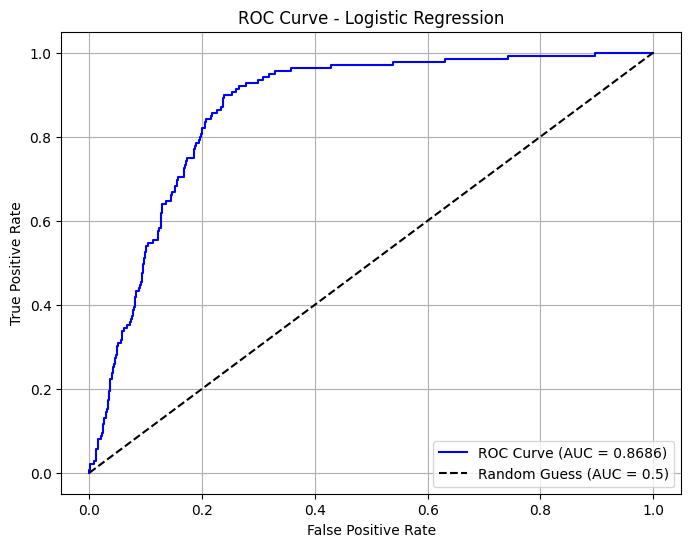

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# 3. Buat dan latih model regresi logistik
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Prediksi kelas dan probabilitas
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]  # Probabilitas kelas 1

# 5. Evaluasi dengan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# 6. Hitung dan tampilkan AUC
auc = roc_auc_score(y_val, y_proba)
print(f"\nAUC Score: {auc:.4f}")

# 7. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

plt.figure(figsize  =(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

def evaluate_models(models, X_train, X_val, y_train, y_val):
    plt.figure(figsize=(10, 8))
    results = []

    for model in models:
        name = type(model).__name__
        print(f"\nModel: {name}")
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            # Probabilitas untuk kelas 1
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_val)[:, 1]
            elif hasattr(model, "decision_function"):
                y_proba = model.decision_function(X_val)
            else:
                print("Model tidak mendukung probabilitas, skip ROC.")
                continue

            # Confusion Matrix dan Classification Report
            print("Confusion Matrix:")
            print(confusion_matrix(y_val, y_pred))
            print("\nClassification Report:")
            print(classification_report(y_val, y_pred))

            # AUC
            auc = roc_auc_score(y_val, y_proba)
            auc_str = format(auc, ".4f")
            results.append({'Model': name, 'AUC': auc_str})

            # Plot ROC Curve
            fpr, tpr, _ = roc_curve(y_val, y_proba)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

        except Exception as e:
            print(f"Gagal evaluasi model {name}: {str(e)}")


    return pd.DataFrame(results).sort_values(by='AUC', ascending=False)


In [ ]:
list_of_model = [
    LogisticRegression(max_iter = 1000),
    LogisticRegressionCV(max_iter = 10000),
    GradientBoostingClassifier(random_state = 0),
    HistGradientBoostingClassifier(random_state = 0),
    CatBoostClassifier(random_state = 0),
    XGBClassifier(random_state = 0),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), QuadraticDiscriminantAnalysis()
]


Model: LogisticRegression
Confusion Matrix:
[[977 282]
 [ 20 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1259
           1       0.30      0.86      0.44       139

    accuracy                           0.78      1398
   macro avg       0.64      0.82      0.65      1398
weighted avg       0.91      0.78      0.82      1398


Model: LogisticRegressionCV
Confusion Matrix:
[[991 268]
 [ 33 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1259
           1       0.28      0.76      0.41       139

    accuracy                           0.78      1398
   macro avg       0.63      0.77      0.64      1398
weighted avg       0.90      0.78      0.82      1398


Model: GradientBoostingClassifier
Confusion Matrix:
[[1060  199]
 [  31  108]]

Classification Report:
              precision    recall  f1-score   support

 

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Confusion Matrix:
[[627 632]
 [ 23 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      1259
           1       0.16      0.83      0.26       139

    accuracy                           0.53      1398
   macro avg       0.56      0.67      0.46      1398
weighted avg       0.88      0.53      0.62      1398



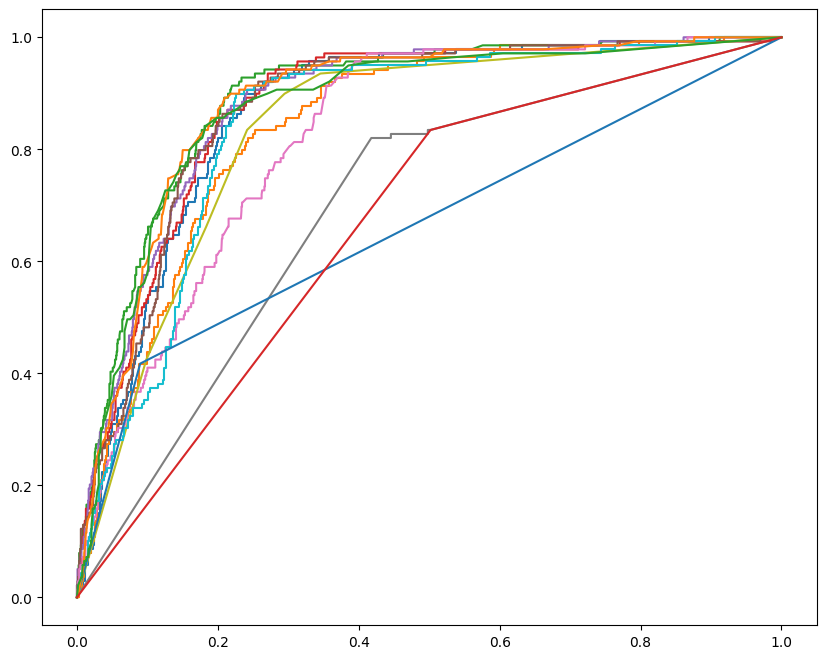

In [ ]:
results_df = evaluate_models(list_of_model, X_train, X_val, y_train, y_val)



In [ ]:
results_df

,Model,AUC
2,GradientBoostingClassifier,0.8928
11,AdaBoostClassifier,0.8845
4,CatBoostClassifier,0.8818
3,HistGradientBoostingClassifier,0.8774
12,RandomForestClassifier,0.8754
5,XGBClassifier,0.8750
0,LogisticRegression,0.8686
9,SVC,0.8464
1,LogisticRegressionCV,0.8429
8,KNeighborsClassifier,0.8365


# Feature Importance

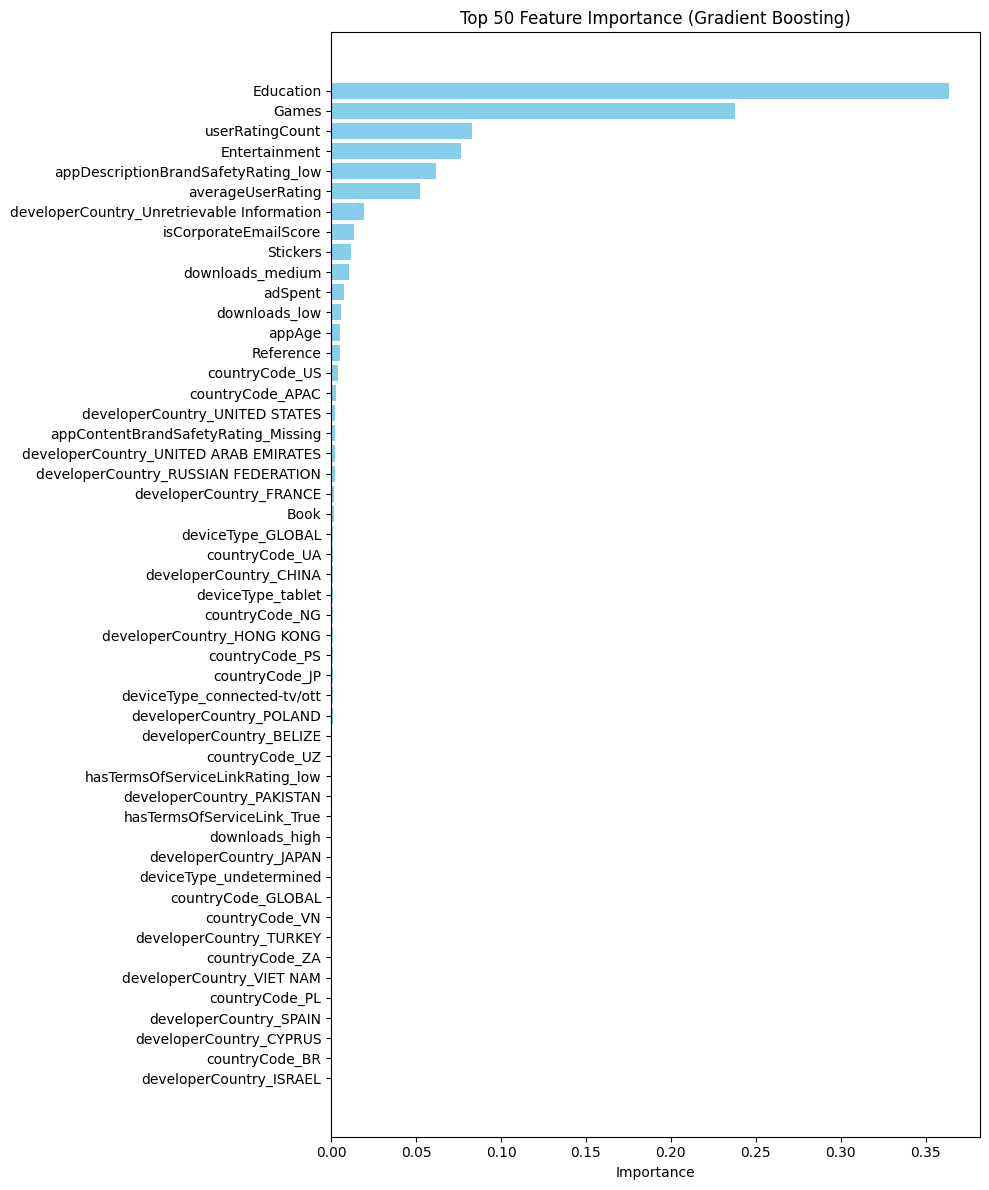

In [ ]:
# Train model
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = X_train.columns

# Buat dataframe untuk kemudahan
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_50 = feat_imp_df.head(50)

# Visualisasi
plt.figure(figsize=(10, 12))  # tinggi ditambah agar tidak berjejal
plt.barh(top_50['Feature'], top_50['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 50 Feature Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Prediction

In [ ]:
# Predict the test set
model = GradientBoostingClassifier(random_state = 0)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

In [ ]:
df_te['ID'] = df_te.index

In [ ]:
predictions = pd.DataFrame()
predictions['ID'] = df_te['ID']
predictions['coppaRisk'] = Y_pred
predictions['coppaRisk'].replace({1:True, 0:False}, inplace=True)
predictions

<ipython-input-84-0f3ff2ea13d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions['coppaRisk'].replace({1:True, 0:False}, inplace=True)
<ipython-input-84-0f3ff2ea13d1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predictions['coppaRisk'].replace({1:True, 0:False}, inplace=True)


,ID,coppaRisk
ID,,
2807,2807,False
1742,1742,False
806,806,True
2635,2635,False
9047,9047,False
...,...,...
2288,2288,False
5541,5541,False
9259,9259,False


In [ ]:
predictions['coppaRisk'].value_counts()

,count
coppaRisk,
False,2340
True,660


In [ ]:
predictions.to_csv('gradientboostingClassifier_notuning_1804251123.csv', index=False)